In [5]:
import sympy
from sympy import S, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [10]:
from sympy.abc import x, y

def f(x, y):
    return x**2-x*y-2*y**2

def grad_f(f, *var):
    return Matrix([f(*var).diff(variable) for variable in var])

def grad_f_point(f, var_dict):
    return grad_f(f, *var_dict.keys()).subs(var_dict)

display("ГРАДИЕНТ", grad_f(f, x, y))
display("ГРАДИЕНТ В ТОЧКЕ", grad_f_point(f, {x: 0, y: 1}))
display("ПРОИЗВОДНАЯ ПО НАПРАВЛЕНИЮ", grad_f_point(f, {x: 0, y: 1}).dot(Matrix((S(1)/2, S(sympy.sqrt(3)/2)))))
# (1/2, sqrt(3)/2) - единичный вектор в направлении 60 градусов от полож. направления оси ОХ

'ГРАДИЕНТ'

Matrix([
[ 2*x - y],
[-x - 4*y]])

'ГРАДИЕНТ В ТОЧКЕ'

Matrix([
[-1],
[-4]])

'ПРОИЗВОДНАЯ ПО НАПРАВЛЕНИЮ'

-2*sqrt(3) - 1/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

'УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ'

Eq(z - 1, 2*x + 2*y - 2)

'УРАВНЕНИЕ НОРМАЛИ'

Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

'УРАВНЕНИЕ ПЛОСКОСТИ'

Eq(z - 1, 2*x + 2*y - 2)

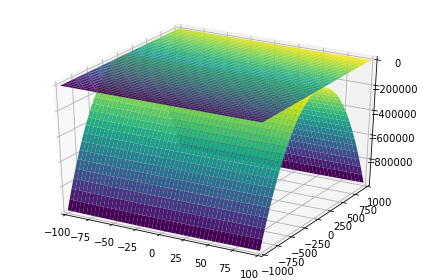

In [35]:
from sympy.abc import z


f = x**2/2 - y**2
M = Point(2, -1, 1)
dictM = {x: M.x, y: M.y, z: M.z}

fdx = f.diff(x).subs(dictM)
fdy = f.diff(y).subs(dictM)

planeM = sympy.Eq(z - M.z, fdx*(x - M.x) + fdy*(y - M.y))
display("УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ", planeM)

norm_line = sympy.Eq(sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False), (z - M.z)/(-1), evaluate=False)
display("УРАВНЕНИЕ НОРМАЛИ", norm_line)

plane = solve(planeM, z)[0]
display("УРАВНЕНИЕ ПЛОСКОСТИ", planeM)

plot3d(plane, f, (x, -100, 100), (y, -1000, 1000))

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

'УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ'

Eq(-2*a*(-a + y), 0)

'УРАВНЕНИЕ НОРМАЛИ'

Eq(Eq(zoo*x, -(-a + y)/(2*a)), zoo*(a + z))

'УРАВНЕНИЯ ПЛОСКОСТЕЙ'

-3*x*y/(27*a**3/2 + sqrt(729*a**6 - 2916*x**3*y**3)/2)**(1/3) - (27*a**3/2 + sqrt(729*a**6 - 2916*x**3*y**3)/2)**(1/3)/3

-3*x*y/((-1/2 - sqrt(3)*I/2)*(27*a**3/2 + sqrt(729*a**6 - 2916*x**3*y**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27*a**3/2 + sqrt(729*a**6 - 2916*x**3*y**3)/2)**(1/3)/3

-zoo*a*(-a + y) - a

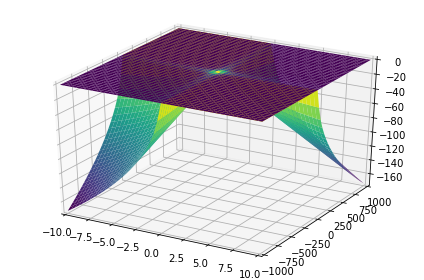

In [66]:
from sympy.abc import a, z

F = 3*x*y*z-z**3 - a**3
M = Point(0, a, -a)
dictM = {x: M.x, y: M.y, z: M.z}

Fdx = f.diff(x).subs(dictM)
Fdy = f.diff(y).subs(dictM)
Fdz = f.diff(z).subs(dictM)

planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
display("УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ", planeM)

norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)
display("УРАВНЕНИЕ НОРМАЛИ", norm_line)

plane1 = list(solve(F, z))[0]
plane2 = list(solve(F, z))[1]
plane3 = M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y)) #это выразили z из уравнения касательной плоскости
display("УРАВНЕНИЯ ПЛОСКОСТЕЙ", plane1, plane2, plane3)

# ПОДСТАВЛЯЮ A = 1, ИНАЧЕ НЕ РИСУЕТ
F = 3*x*y*z-z**3 - 1
M = Point(0, 1, -1)
plane1 = list(solve(F, z))[0]
plane2 = list(solve(F, z))[1]
plane3 = M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y)) #это выразили z из уравнения касательной плоскости
plot3d(plane1, plane2, (x, -10, 10), (y, -1000, 1000))

### Индивидуальное задание.
Поверхность задана уравнением $x^2+y^2+z^2=2Rz$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=1$, $\alpha=\pi/6$.

'УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ'

Eq(-2*R*(-R*sin(a) + y)*sin(a) + R*(-R*cos(a) + x)*cos(a), 0)

'УРАВНЕНИЕ НОРМАЛИ'

Eq(Eq((-R*cos(a) + x)/(R*cos(a)), -(-R*sin(a) + y)/(2*R*sin(a))), zoo*(-R + z))

'УРАВНЕНИЯ ПЛОСКОСТЕЙ'

R - sqrt(R**2 - x**2 - y**2)

R + sqrt(R**2 - x**2 - y**2)

R - zoo*(-2*R*(-R*sin(a) + y)*sin(a) + R*(-R*cos(a) + x)*cos(a))

'УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ'

Eq(-y + sqrt(3)*(x - sqrt(3)/2)/2 + 1/2, 0)

'УРАВНЕНИЕ НОРМАЛИ'

Eq(Eq(2*sqrt(3)*(x - sqrt(3)/2)/3, 1/2 - y), zoo*(z - 1))

'УРАВНЕНИЯ ПЛОСКОСТЕЙ'

1 - sqrt(-x**2 - y**2 + 1)

sqrt(-x**2 - y**2 + 1) + 1

-zoo*(-y + sqrt(3)*(x - sqrt(3)/2)/2 + 1/2) + 1

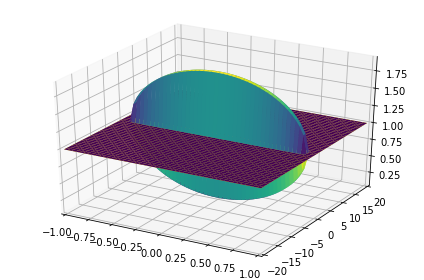

In [70]:
from sympy.abc import R, z, a

F = x**2+y**2+z**2-2*R*z
M = Point(R*Cos(a), R*Sin(a), R)
dictM = {x: M.x, y: M.y, z: M.z}

Fdx = f.diff(x).subs(dictM)
Fdy = f.diff(y).subs(dictM)
Fdz = f.diff(z).subs(dictM)

planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
display("УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ", planeM)

norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)
display("УРАВНЕНИЕ НОРМАЛИ", norm_line)

plane1 = list(solve(F, z))[0]
plane2 = list(solve(F, z))[1]
plane3 = M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y)) #это выразили z из уравнения касательной плоскости
display("УРАВНЕНИЯ ПЛОСКОСТЕЙ", plane1, plane2, plane3)
print()
print()
print()

# ----------------------   ДАЛЬШЕ R = 1, a = PI/6   ----------------------
F = x**2+y**2+z**2-2*z
M = Point(Cos(sympy.pi/6), Sin(sympy.pi/6), 1)
dictM = {x: M.x, y: M.y, z: M.z}

Fdx = f.diff(x).subs(dictM)
Fdy = f.diff(y).subs(dictM)
Fdz = f.diff(z).subs(dictM)

planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
display("УРАВНЕНИЕ КАСАТЕЛЬНОЙ ПЛОСКОСТИ", planeM)

norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), (z - M.z)/Fdz, evaluate=False)
display("УРАВНЕНИЕ НОРМАЛИ", norm_line)

plane1 = list(solve(F, z))[0]
plane2 = list(solve(F, z))[1]
plane3 = M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y)) #это выразили z из уравнения касательной плоскости
display("УРАВНЕНИЯ ПЛОСКОСТЕЙ", plane1, plane2, plane3)

plot3d(plane1, plane2, (x, -1, 1), (y, -20, 20))